<a href="https://colab.research.google.com/github/Kushal-Shr/Intro-to-AI/blob/main/ICP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [13]:
dataset = pd.read_csv('data.csv')

In [15]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

In [20]:
dataset = dataset.drop(columns=['id'])

In [22]:
X = dataset.drop(columns=['diagnosis']).values
y = dataset['diagnosis'].values

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=87
)

In [25]:
# Without normalization

np.random.seed(155)

model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100)

print(model.summary())
print(model.evaluate(X_test, Y_test))

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4757 - loss: 13.4903
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5779 - loss: 2.6833 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 1.0815 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.7433 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8775 - loss: 0.6166 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8881 - loss: 0.3715 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9245 - loss: 0.2861 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.3013 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9201 - loss: 0.2790 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.2341 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9407 - loss: 0.2383 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

None
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8506 - loss: 0.3800  
[0.3335389494895935, 0.881118893623352]


In [28]:
# With normalization

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model_norm = Sequential()
model_norm.add(Dense(30, input_dim=30, activation='relu'))
model_norm.add(Dense(15, activation='relu'))
model_norm.add(Dense(1, activation='sigmoid'))

model_norm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_norm.fit(X_train_scaled, Y_train, epochs=100)

print(model_norm.summary())
print(model_norm.evaluate(X_test_scaled, Y_test))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8352 - loss: 0.5271
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9187 - loss: 0.3674 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9512 - loss: 0.2604
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9549 - loss: 0.2024
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.1588  
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9639 - loss: 0.1296 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9493 - loss: 0.1392 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9710 - loss: 0.0866 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9610 - loss: 0.0961 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9821 - loss: 0.0732
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9688 - loss: 0.0773  
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

None
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9448 - loss: 0.5364 
[0.4054616689682007, 0.9580419659614563]


# **Normalization increases the accuracy**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten 28×28 to 784
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

# One-hot encoding (0–9)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [31]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(
    X_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8445 - loss: 0.5523 - val_accuracy: 0.9526 - val_loss: 0.1580
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9629 - loss: 0.1239 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9766 - loss: 0.0776 - val_accuracy: 0.9677 - val_loss: 0.1066
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9849 - loss: 0.0521 - val_accuracy: 0.9725 - val_loss: 0.0938
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9894 - loss: 0.0372 - val_accuracy: 0.9752 - val_loss: 0.0823
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.9769 - val_loss: 0.0832
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9766 - val_loss: 0.0846
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy:

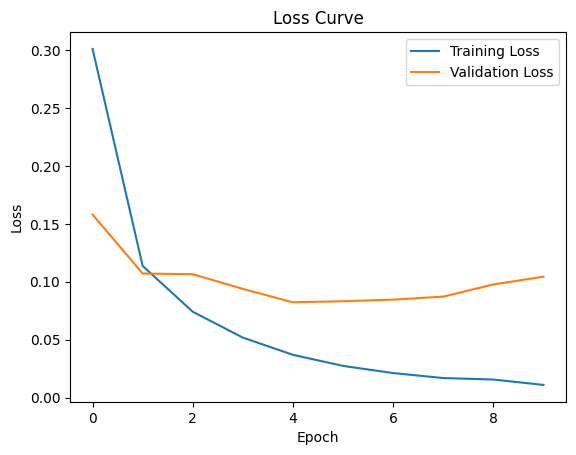

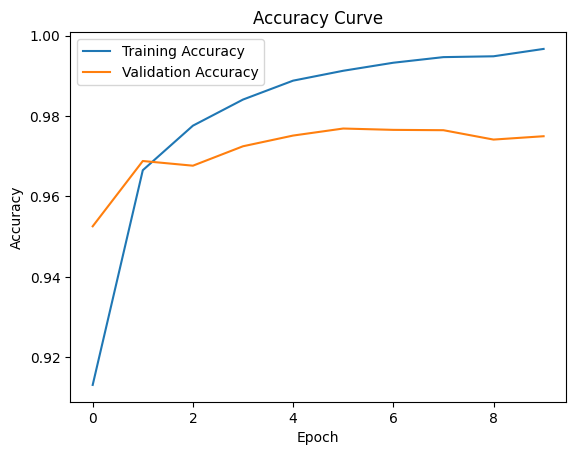

In [33]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

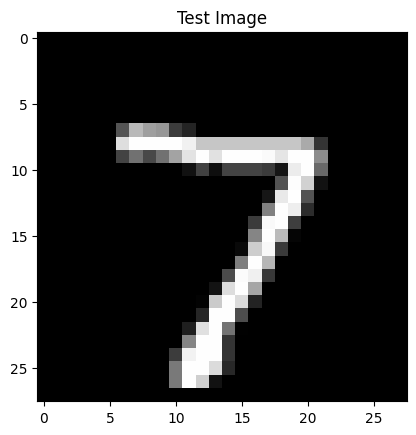

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Model prediction: 7
Actual label: 7


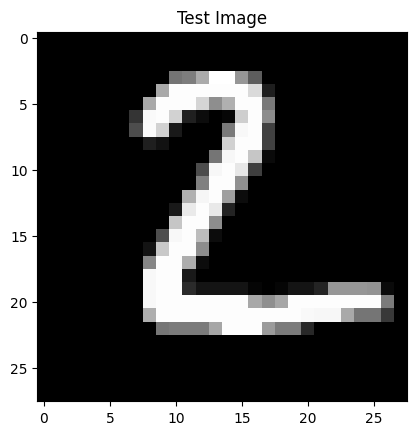

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Model prediction: 2
Actual label: 2


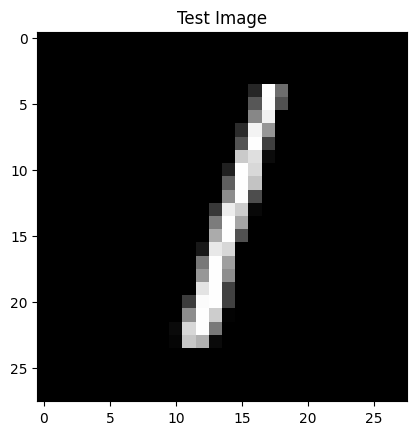

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Model prediction: 1
Actual label: 1


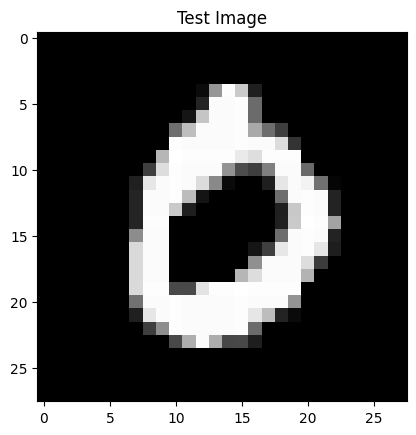

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction: 0
Actual label: 0


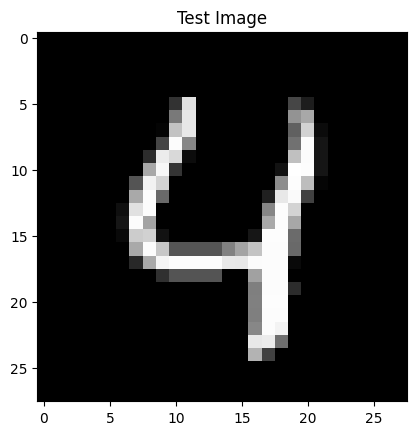

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model prediction: 4
Actual label: 4


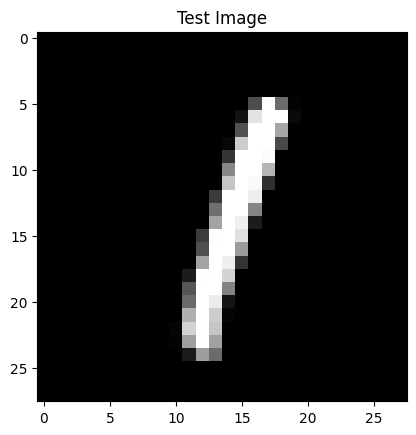

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction: 1
Actual label: 1


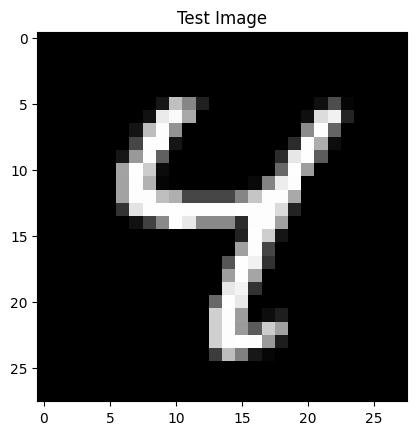

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model prediction: 4
Actual label: 4


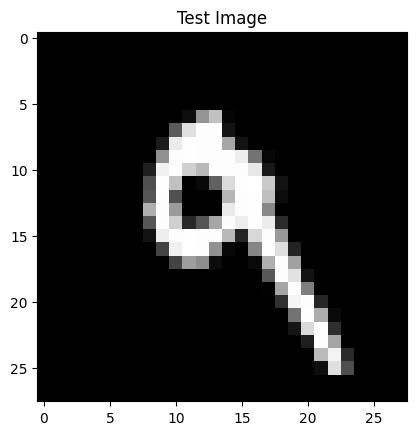

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction: 9
Actual label: 9


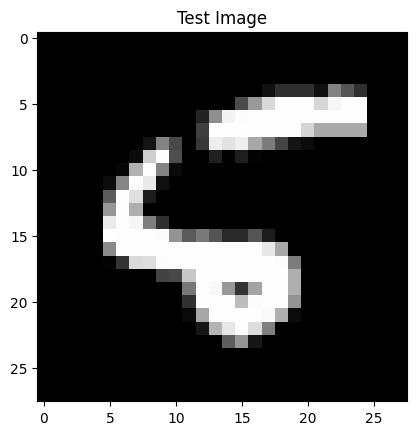

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model prediction: 5
Actual label: 5


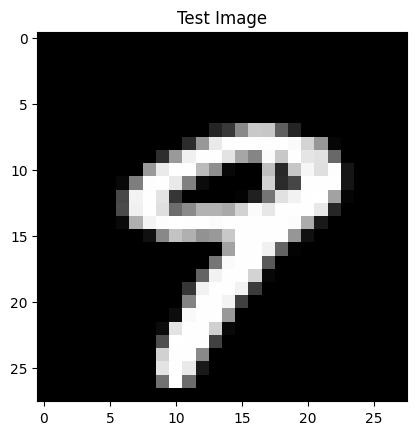

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction: 9
Actual label: 9


In [47]:
# Running on 10 images from index 0 to 9
for i in range(10):
    plt.imshow(X_test[i], cmap="gray")
    plt.title("Test Image")
    plt.show()

    # Prepare for prediction
    img = X_test[i].reshape(1, 784)
    prediction = model.predict(img)
    print("Model prediction:", np.argmax(prediction))
    print("Actual label:", y_test[i])

In [42]:
model_tanh = Sequential()
model_tanh.add(Dense(256, activation='tanh', input_shape=(784,)))
model_tanh.add(Dense(128, activation='tanh'))
model_tanh.add(Dense(64, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))

model_tanh.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_tanh = model_tanh.fit(
    X_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=128
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8455 - loss: 0.5275 - val_accuracy: 0.9483 - val_loss: 0.1792
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9548 - loss: 0.1580 - val_accuracy: 0.9567 - val_loss: 0.1453
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9703 - loss: 0.0998 - val_accuracy: 0.9667 - val_loss: 0.1107
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9781 - loss: 0.0715 - val_accuracy: 0.9700 - val_loss: 0.1008
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9857 - loss: 0.0498 - val_accuracy: 0.9697 - val_loss: 0.1034
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9884 - loss: 0.0408 - val_accuracy: 0.9716 - val_loss: 0.0965
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9907 - loss: 0.0315 - val_accuracy: 0.9743 - val_loss: 0.0892
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accurac

In [44]:
# Without scaling the images

(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

X_train2_flat = X_train2.reshape(60000, 784)
X_test2_flat = X_test2.reshape(10000, 784)

y_train2_cat = to_categorical(y_train2, 10)
y_test2_cat = to_categorical(y_test2, 10)

model_raw = Sequential()
model_raw.add(Dense(256, activation='relu', input_shape=(784,)))
model_raw.add(Dense(128, activation='relu'))
model_raw.add(Dense(10, activation='softmax'))

model_raw.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_raw = model_raw.fit(
    X_train2_flat, y_train2_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=128
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7817 - loss: 10.6986 - val_accuracy: 0.9218 - val_loss: 0.7045
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9336 - loss: 0.4854 - val_accuracy: 0.9362 - val_loss: 0.4628
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9574 - loss: 0.2414 - val_accuracy: 0.9397 - val_loss: 0.3814
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9640 - loss: 0.1791 - val_accuracy: 0.9404 - val_loss: 0.3878
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9701 - loss: 0.1314 - val_accuracy: 0.9533 - val_loss: 0.3167
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9757 - loss: 0.1021 - val_accuracy: 0.9551 - val_loss: 0.3053
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9786 - loss: 0.0876 - val_accuracy: 0.9576 - val_loss: 0.2676
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9781 - loss: 0.0951 - val_accuracy

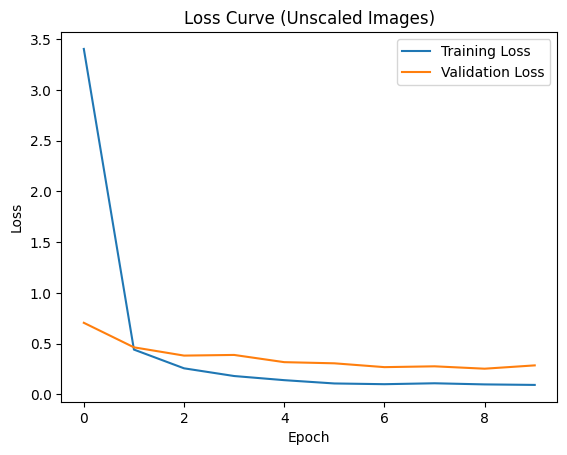

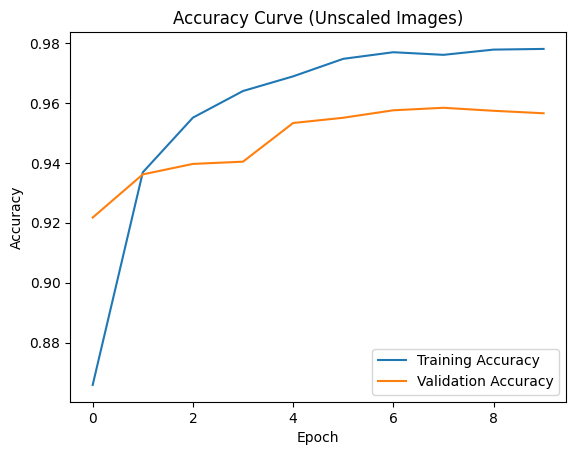

In [45]:
# Plot Loss (Unscaled)
plt.plot(history_raw.history['loss'], label='Training Loss')
plt.plot(history_raw.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve (Unscaled Images)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy (Unscaled)
plt.plot(history_raw.history['accuracy'], label='Training Accuracy')
plt.plot(history_raw.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve (Unscaled Images)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
